In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

**<font size='5' color='red'>ch02. 한글 형태소 분석</font>**

# 1. 자연어 처리
 - 일상적인 언어를 처리
 - 자연어 처리 분야
     * 자연어 이해 : 형태소 분석 -> pos tagging -> 의미 분석
     * 자연어 생성 : 대화 분석 -> 다음 문장이나 단어를 출력(RNN, LSTM, ..., GAN, 생성형 알고르즘)
 - 활용분야 : 트렌드분석, 맞춤법검사, 번역기, 키워드분석, 챗봇

# 2. 자연어 처리 절차
 - 전처리 : 단어, 어절 추출
 - 분석 후보 생성 : 형태소 분리, 품사 태깅(pos tagging)
 - 제약조건(불용어 처리) : 규칙 확인
 - 분석 : 시각화(워드클라우드), 연관분석, RNN, LSTM, ...

# 3. 한글 형태소 분석 엔진(Konlpy)
* 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사 태그)
* HanNanum만의 기능 : analyze(형태소 후보 반환)
* Kkma만의 기능 : 텍스트를 문장별로 나누는 기능

- Konlpy : python용 자연어 처리기(JPype1(C++ v14) 패키지를 의존) // https://pypi.org/project/jpype1/#files : python 버전과 맞춰 설치
    * pip install konlpy
        + HanNanum : 자바로 만든 형태소 분석기(JAVA_HOME 시스템변수 필요)
        + Kkma : 서울대에서 자바로 만든 형태소 분석기(JAVA_HOME 시스템변수 필요)
        + Komoran : 자바로 만든 형태소 분석기(JAVA_HOME 시스템변수 필요)
        + Okt
    * pip install python-mecab-ko
        + MeCab : C++로 작성되었고, 저사양 환경에서 사용 가능. 다양한 언어의 바인딩 지원.
- Konlp : R용 자연어 처리기

In [2]:
import os
os.environ.get('JAVA_HOME')
# VC++ 14 버전 이상 설치

'C:\\Program Files\\Java\\jdk-17'

In [3]:
# pip install jpype1  # 내 OS와 python버전에 맞는 최신 버전의 whl 설치파일을 찾아 설치

In [4]:
%ls

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: EC0C-568F

 D:\imsehyeon\source\10_자연어처리 디렉터리

2025-01-13  오전 09:46    <DIR>          .
2025-01-13  오전 09:46    <DIR>          ..
2024-12-12  오전 09:59                19 .gitignore
2025-01-03  오후 03:32    <DIR>          .ipynb_checkpoints
2024-12-30  오전 09:37           330,039 ch01_NLTK자연어처리 패키지.ipynb
2024-12-31  오후 05:27         1,347,509 ch02_한글형태소분석.ipynb
2024-12-31  오후 05:27           401,637 ch02_한글형태소분석_Quiz.ipynb
2024-12-31  오후 05:36            50,264 ch03_연관분석.ipynb
2025-01-13  오전 09:46           100,234 ch04_RNN.ipynb
2025-01-13  오전 09:46            29,915 ch05_LSTM(영화평감정분석).ipynb
2025-01-03  오후 03:31            85,796 ch06_GNMT스마트번역기.ipynb
2024-12-31  오후 01:08    <DIR>          data
2025-01-03  오전 10:05    <DIR>          trans_dataset
2025-01-03  오후 05:07           659,507 시계열분석예제.ipynb
               9개 파일           3,004,920 바이트
               5개 디렉터리  231,224,610,816 바이트 남음


In [5]:
! pip install jpype1-1.5.1-cp310-cp310-win_amd64.whl
# pip install jpype1==1.5.0

Processing d:\imsehyeon\source\10_자연어처리\jpype1-1.5.1-cp310-cp310-win_amd64.whl


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'D:\\imsehyeon\\source\\10_자연어처리\\jpype1-1.5.1-cp310-cp310-win_amd64.whl'



In [6]:
# pip install konlpy  # 설치 후, 아래의 코드가 실행되지 않을 경우
# pip uninstall konlpy -> pip uninstall jpype1
# ! pip install jpype1-1.5.0-cp310-cp310-win_amd64.whl  # ! pip install jpype1-1.4.0-cp310-cp310-win_amd64.whl  # 택 1
# pip install konlpy

In [7]:
text = '아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번 째로 많이 사용되는 언어입니다'

## 3.1 HanNanum

In [8]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None,        # 생성자 함수
                    max_heap_size=1024)  # 기본값:1024, '1g', '2048m'
hannanum.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu')]],
 [[('째', 'ncn'), ('로', 'jca')],
  [('째로', 'ncn')],
  [('째', 'nqq'), ('로', 'jca')],
  [('째로', 'nqq')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 

- pos tagging chart 다운로드
    * 구글에서 konlpy docs 검색 후 konlpy.org
    * api 메뉴 클릭 -> '품사 태깅 클래스 간 비교(Comparision between POS tagging classes)' 클릭
    * '한국어 품사 태그 비교표(Korean POS tags comparision chart)' 클릭

In [9]:
# 형태소 분석 : morphs
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [10]:
# 명사만 추출
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '째', '사용', '언어']


In [11]:
# 품사태그
print(hannanum.pos(text))  # 기본값:ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'N'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]


In [12]:
print(hannanum.pos(text, ntags=22))

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'NC'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [13]:
# 퀴즈1 : text 중에서 형용사(PA)만 추출
tagged_text = hannanum.pos(text, ntags=22)
for token, tag in tagged_text:
    if tag == 'PA':
        print(token, tag)
[(word, pos) for word, pos in tagged_text if pos == 'PA']
[tagtext[0] for tagtext in tagged_text if tagtext[1] == 'PA']
[token for token, tag in tagged_text if tag == 'PA']

아름답 PA
많 PA


['아름답', '많']

In [14]:
# 퀴즈2 : text 중에서 보통명사(NC)만 추출
tagged_text = hannanum.pos(text, ntags=22)
for token, tag in tagged_text:
    if tag == 'NC':
        print(token, tag)
[(word, pos) for word, pos in tagged_text if pos == 'NC']
[tagtext[0] for tagtext in tagged_text if tagtext[1] == 'NC']
[token for token, tag in tagged_text if tag == 'NC']

복잡 NC
한국어 NC
전세계 NC
째 NC
사용 NC
언어 NC


['복잡', '한국어', '전세계', '째', '사용', '언어']

## 3.2 Kkma

In [15]:
from konlpy.tag import Kkma
kkma = Kkma()  # 기본 max_heap_size는 1024 바이트 '10m', '1g'

In [16]:
print(kkma.morphs(text))  # 형태소 분석

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [17]:
print(kkma.nouns(text))  # 명사 추출

['복잡', '한국어', '전세계', '13', '13번', '번', '째로', '사용', '언어']


In [18]:
print(kkma.pos(text))  # 품사 태깅 : ntags 조정 불가

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번', 'NNM'), ('째로', 'UN'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [19]:
# 보통명사(NNG), 고유명사(NNP)
tagged_text = kkma.pos(text)
[word for word, tag in tagged_text if (tag == 'NNG') | (tag == 'NNP')]
[word for word, tag in tagged_text if tag == 'NNG' or tag == 'NNP']
[word for word, tag in tagged_text if tag in ('NNG', 'NNP')]

['복잡', '한국어', '전세계', '사용', '언어']

## 3.3 Komoran

In [20]:
from konlpy.tag import Komoran
komoran = Komoran()  # 기본값:max_heap_size=1024, 조정 가능

In [21]:
print(komoran.morphs(text))  # 형태소 분석

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [22]:
print(komoran.nouns(text))  # 명사 추출

['한국어', '전', '세계', '번', '사용', '언어']


In [23]:
print(komoran.pos(text))  # 품사 태깅 : ntags 조정 불가

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [24]:
# 일반명사(NNG), 고유명사(NNP)
[word for word, tag in komoran.pos(text) if tag in ('NNG', 'NNP')]
[(word, tag) for word, tag in komoran.pos(text) if tag in ('NNG', 'NNP')]

[('한국어', 'NNP'), ('전', 'NNG'), ('세계', 'NNG'), ('사용', 'NNG'), ('언어', 'NNG')]

## 3.4 MeCab
 - pip install python-mecab-ko

In [25]:
from mecab import MeCab  # 가장 가벼운 엔진
mecab = MeCab()

In [26]:
print('형태소 추출 : ', mecab.morphs(text))
print('명사 추출 : ', mecab.nouns(text))
print('품사 태깅 : ', mecab.pos(text))

형태소 추출 :  ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다']
명사 추출 :  ['한국어', '세계', '번', '사용', '언어']
품사 태깅 :  [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EC')]


In [27]:
print('일반명사 추출 : ', [token for token, tag in mecab.pos(text) if tag == 'NNG'])

일반명사 추출 :  ['한국어', '세계', '사용', '언어']


## 3.5 Twitter(Okt : Open Korean Text)
 - konlpy 버전 0.4.5부터 Okt로 명칭 변경. 가장 쓰임이 적음.

In [28]:
import konlpy
konlpy.__version__

'0.6.0'

In [29]:
from konlpy.tag import Twitter, Okt
# twitter = Twitter()  # warning 발생(Okt 명칭 변경)
twitter = Okt()
print('구 추출 : ', twitter.phrases(text))  # 구 추출
print('형태소 : ', twitter.morphs(text))
print('명사만 : ', twitter.nouns(text))
print('품사태깅 : ', twitter.pos(text))
print('명사만 : ', [token for token, tag in twitter.pos(text) if tag == 'Noun'])

구 추출 :  ['다소', '한국어', '전세계', '13번', '사용', '사용되는 언어', '13', '언어']
형태소 :  ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째로', '많이', '사용', '되는', '언어', '입니다']
명사만 :  ['다소', '한국어', '전세계', '번', '사용', '언어']
품사태깅 :  [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째로', 'Verb'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective')]
명사만 :  ['다소', '한국어', '전세계', '번', '사용', '언어']


# 4. 말뭉치

In [30]:
! pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\4545\anaconda3\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [31]:
from konlpy.corpus import kolaw

In [32]:
# data = kolaw.open('constitution.txt').readlines()  # 한 줄씩 list로 가져옴
data = kolaw.open('constitution.txt').read()
print('글자수 : ', len(data))
print('%r' % data[:100])  # \n까지 그대로 출력

글자수 :  18884
'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'


# 5. 워드 클라우드
 - pip install wordcloud

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
import nltk
from nltk.tokenize import RegexpTokenizer  # 단어 추출(정규표현식 활용)
from nltk.tag import pos_tag
# text 가져오기
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

# 단어 추출
ret = RegexpTokenizer('[\w]{3,}')  # \w:숫자,알파벳, {3,}:3글자이상
words = ret.tokenize(emma)

# words중에서 명사만 추출
emma_tags = pos_tag(words)
# noun_list = [emma_tag[0] for emma_tag in emma_tags if emma_tag[1] in ('NN', 'NNS')]
noun_list = [word for word, tag in emma_tags if tag in ('NN', 'NNS')]
emma_noun = ' '.join(noun_list)  # ' ' 단위로 연결
emma_noun[:100]

'clever home disposition blessings existence years world distress daughters indulgent father conseque'

In [35]:
# 명사 갯수(set:중복제거)
len(noun_list), len(set(noun_list))

(22147, 3564)

- 컬러맵 : https://matplotlib.org/tutorials/colors/colormaps.html

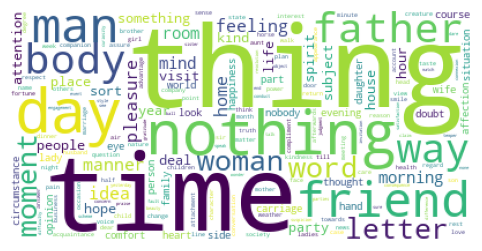

In [36]:
wordc = WordCloud(
            background_color='white',  # 배경색
            max_words=400,             # 표시될 단어의 최대 갯수(기본값:200)
            relative_scaling=0.2,      # 단어 빈도에 따른 크기 차이 조정(기본값:0.5)
            colormap='viridis')        # 컬러맵
wordc.generate(emma_noun)
plt.figure(figsize=(10, 3))
plt.imshow(wordc)
plt.axis('off')
plt.show()

In [37]:
# data = kolaw.open('constitution.txt').read() 명사 추출 후 하나의 연결된 문자 : ' '.join(명사 추출 리스트)
from konlpy.tag import Kkma
kkma = Kkma()
# word_list = kkma.nouns(data)
# 보통명사:NNG, 고유명사:NNP
# 불용어 처리 이 위치에서 가능
word_list = [word for word, tag in kkma.pos(data) if tag in ('NNG', 'NNP')]
data_noun = ' '.join(word_list)
data_noun[:20]

'대한민국 헌법 유구 역사 전통 국민 '

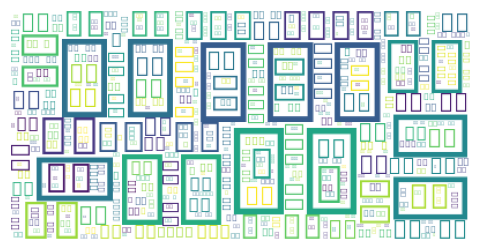

In [38]:
wordc = WordCloud(
            background_color='white',  # 배경색
            max_words=400,             # 표시될 단어의 최대 갯수(기본값:200)
            relative_scaling=0.2,      # 단어 빈도에 따른 크기 차이 조정(기본값:0.5)
            colormap='viridis')        # 컬러맵
wordc.generate(data_noun)
plt.figure(figsize=(10, 3))
plt.imshow(wordc)  # 한글 깨짐
plt.axis('off')
plt.show()

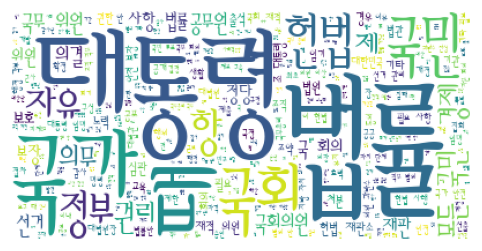

In [39]:
wordc = WordCloud(
            background_color='white',  # 배경색
            max_words=400,             # 표시될 단어의 최대 갯수(기본값:200)
            relative_scaling=0.2,      # 단어 빈도에 따른 크기 차이 조정(기본값:0.5)
            colormap='viridis',        # 컬러맵
            font_path='C:/Windows/Fonts/HMKMAMI.TTF'    # 확장자 ttf 폰트 설정
)
wordc.generate(data_noun)
plt.figure(figsize=(10, 3))
plt.imshow(wordc)
plt.axis('off')
plt.show()

In [40]:
# 불용어 처리(불용어 지정 + 불용어 사전에 등재된 단어)
from wordcloud import STOPWORDS
불용어 = STOPWORDS | {'대통령', '때'}  # set함수에서 | : 합집합을 의미
불용어 = {'대통령', '때'}
불용어 = set(['대통령', '때'])

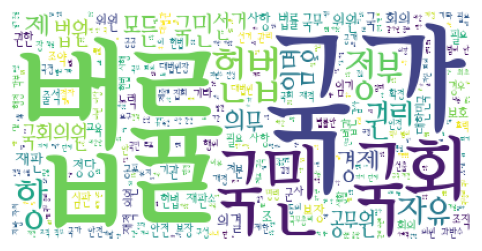

In [41]:
wordcloud = WordCloud(
                background_color='white',
                max_words=300,
                font_path='C:/Windows/Fonts/HMKMAMI.TTF',
                relative_scaling=0.2,
                colormap='viridis',
                stopwords=불용어,
                # width='500'
)
wordcloud.generate(data_noun)
plt.figure(figsize=(10, 3))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

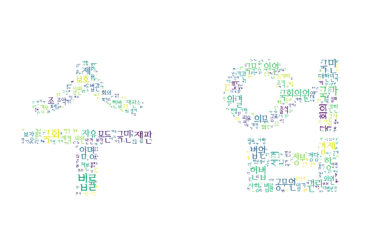

In [42]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞춰 설정
from PIL import Image
import numpy as np
img = Image.open('data/test.png')
mask = np.array(img)
# plt.imshow(mask)
# mask.shape : 3차원

wordcloud = WordCloud(
                background_color='white',
                max_words=300,
                font_path='C:/Windows/Fonts/HMKMAMI.TTF',
                relative_scaling=0.2,
                colormap='viridis',
                stopwords=불용어,
                mask=mask
)
wordcloud.generate(data_noun)
plt.figure(figsize=(10, 3))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

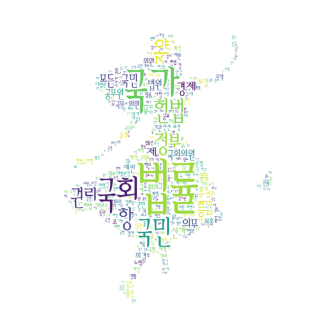

In [43]:
# .convert('RGB')  흑백 1채널 이미지 파일 -> 3채널
# .convert('RGBA') 투명도가 있는 4채널 파일(alpha)
img = Image.open('data/test3.png')
mask = np.array(img)
# plt.imshow(img)
# mask.shape

wordcloud = WordCloud(
                background_color='white',
                max_words=300,
                font_path='C:/Windows/Fonts/HMKMAMI.TTF',
                relative_scaling=0.2,
                colormap='viridis',
                stopwords=불용어,
                mask=mask
)
wordcloud.generate(data_noun)
plt.figure(figsize=(20, 4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

((241, 257, 3), dtype('uint8'))

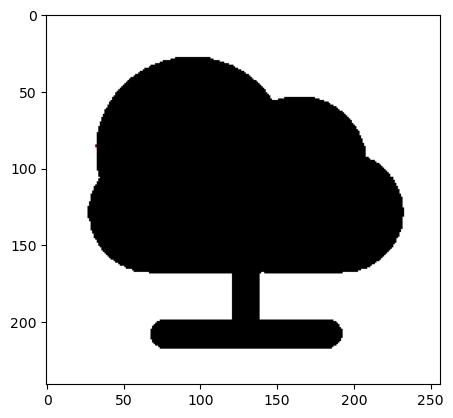

In [44]:
img = Image.open('data/test2.jpg')
mask = np.array(img)
mask = np.where(mask > 200, 255, 0).astype(np.uint8)  # mask가 200보다 큰 값은 255로 나머지는 0으로 변환  # 누끼 제거용 배경색 제거
plt.imshow(mask)
mask.shape, mask.dtype

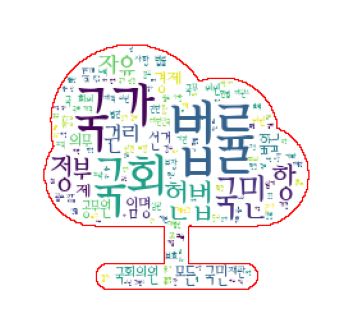

In [45]:
wordcloud = WordCloud(
                background_color='white',
                max_words=300,
                font_path='C:/Windows/Fonts/HMKMAMI.TTF',
                relative_scaling=0.2,
                colormap='viridis',
                stopwords=불용어,
                mask=mask,
                contour_color='red',
                contour_width=1
)
wordcloud.generate(data_noun)
plt.figure(figsize=(20, 4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

((1124, 720, 3), dtype('uint8'))

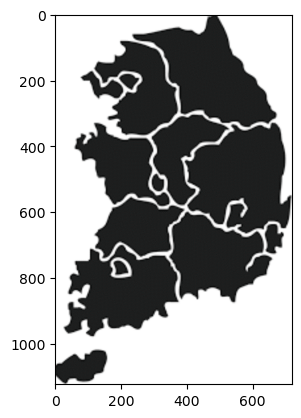

In [46]:
img = Image.open('data/south_korea.png').convert('RGB')  # 1차원 흑백 이미지 데이터 -> 3채널
mask = np.array(img)
plt.imshow(mask)
mask.shape, mask.dtype

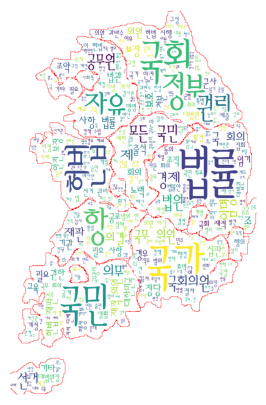

In [47]:
wordcloud = WordCloud(
                background_color='white',
                max_words=300,
                font_path='C:/Windows/Fonts/HMKMAMI.TTF',
                relative_scaling=0.2,
                colormap='viridis',
                stopwords=불용어,
                mask=mask,
                contour_color='red',
                contour_width=1,
                # width=400,
                # height=800
)
wordcloud.generate(data_noun)
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

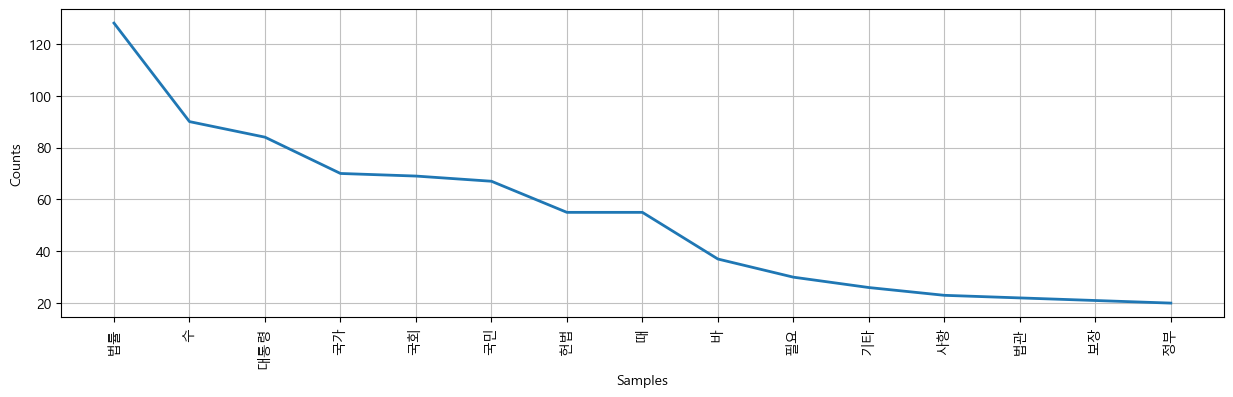

In [1]:
# 단어의 빈도수 시각화(nltk.Text)
# 워드 클라우드에 출현한 명사들을 ' '로 연결된 문자 : data_noun - 대한민국 헌법 유구 ...
# nltk.Text().plot(출현한 명사들 list) : word_list - ['대한민국', '헌법', '유구', ...]
import nltk
import matplotlib.pyplot as plt
from konlpy.tag import Komoran
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
komoran = Komoran()
# 일반명사(NNG), 고유명사(NNP), 의존명사(NNB)
word_list = [token for token, tag in komoran.pos(data) if tag in ('NNG', 'NNP', 'NNB')]
data_text = nltk.Text(word_list)
plt.rc('font', family='Malgun Gothic')  # 윈도우즈용
plt.figure(figsize=(15, 4))
data_text.plot(15)
# plt.xticks(rotation=0)  # 적용 안 됨
plt.show()

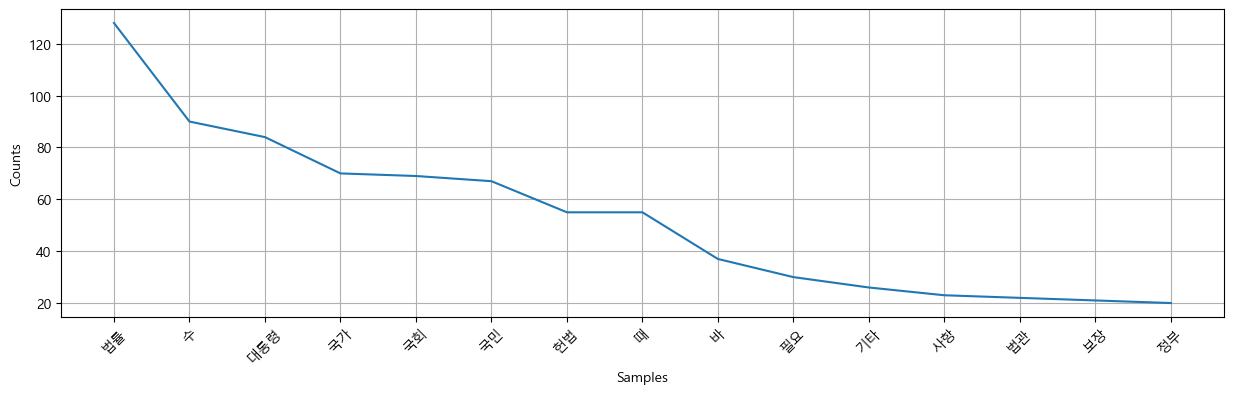

In [2]:
# data_text.vocab().most_common(15)  # 최빈 단어 15개
# words : x축, counts : y축
words, counts = zip(*data_text.vocab().most_common(15))  # *:튜플 매개변수
plt.figure(figsize=(15, 4))
plt.plot(words, counts)
plt.xticks(rotation=45)  # rotation 기본값 : 0
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.grid()
plt.show()

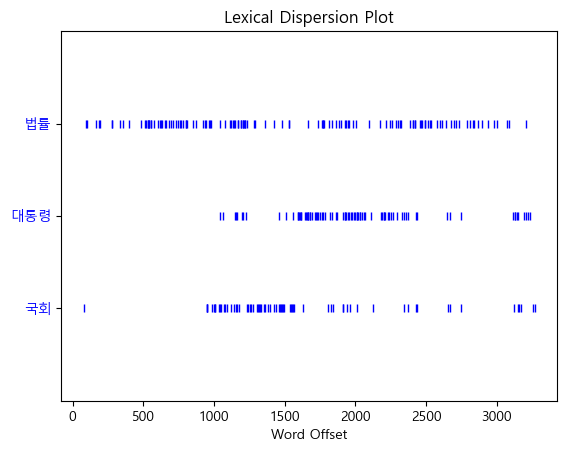

In [3]:
data_text.dispersion_plot(['법률', '대통령', '국회'])

# 6. 단어간 유사성 도출

In [4]:
import requests
from bs4 import BeautifulSoup
rss_url = 'http://fs.jtbc.joins.com/RSS/economy.xml'

In [5]:
jtbc_economy = requests.get(rss_url)
soup = BeautifulSoup(jtbc_economy.content, 'xml')
link_ele = soup.select('item link')
link_list = [link.text for link in link_ele]
print(len(link_list))
link_list

20


['https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220943',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220949',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220832',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220765',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220766',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220665',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220651',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220627',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220516',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220366',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220365',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220169',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220180',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12219888',
 'https://news.jtbc.co.kr/article/article.aspx?n

In [6]:
# link_list들의 뉴스 기사 중 명사만 뽑아 list로 생성
from konlpy.tag import Komoran, Kkma
from mecab import MeCab
komoran = MeCab()
# news = [['등촌', '아파트', '재건축', ...],
#         ['사기', '캠핑', '예약', ...],
#         ['편의점', '도시락', ...]]
news = []
for link in link_list:
    response = requests.get(link)
    news_soup = BeautifulSoup(response.content, 'html.parser')
    title = news_soup.select_one('title').text.replace(' | JTBC 뉴스', '')
    content = str(news_soup.select_one('meta[name="description"]'))
    content = content.replace('<meta content="', '').replace('" name="description"/>', '')
    # print(title + ' ' + content)
    noun_list = komoran.nouns(title + ' ' + content)
    # print('noun 함수 사용 : ', noun_list)
    # 일반명사:NNG, 고유명사:NNP
    noun_list = [word for word, tag in komoran.pos(title + ' ' + content) if tag in ('NNG', 'NNP')]
    # print('pos tagging 이용 : ', noun_list)
    news.append(noun_list)

In [7]:
print('뉴스당 명사 갯수 : ', [len(nouns) for nouns in news])

뉴스당 명사 갯수 :  [164, 145, 18, 21, 27, 23, 26, 17, 18, 20, 26, 19, 21, 28, 26, 29, 31, 25, 21, 31]


In [8]:
[row[:5] for row in news]

[['둔촌', '주공', '전세', '홍수', '예상'],
 ['실제', '캠', '핑장', '관리', '소홀'],
 ['요즘', '편의점', '정도', '앵커', '육박'],
 ['오늘', '말', '이유', '편의점', '도시락'],
 ['경영', '분쟁', '주총', '표', '대결'],
 ['결혼', '돈', '걱정', '예비', '부부'],
 ['예비', '부부', '웨딩', '물가', '올해'],
 ['비정규직', '비중', '역대', '최고', '꼴'],
 ['대통령', '경제', '빨간불', '앵커', '어제'],
 ['수출', '뒷걸음질', '분기', '경제', '성장률'],
 ['날개', '하이닉스', '삼성전자', '역대', '급'],
 ['배추', '정부', '중순', '앵커', '배추'],
 ['내년', '추석', '황금연휴', '항공권', '예약'],
 ['역대', '급', '여름', '폭염', '탓'],
 ['바다', '전어', '현실', '피시', '플레이'],
 ['정부', '자본', '잠식', '티', '재무'],
 ['정부', '피해', '정부', '재무', '상태'],
 ['이상', '아파트', '거래', '최근', '최고'],
 ['서민', '동아줄', '디딤돌', '대출', '불안'],
 ['뉴욕', '증시', '다우', '사상', '최고']]

In [9]:
# 단어간 거리 계산(워드 임베딩하기)
# pip install gensim
from gensim.models import Word2Vec
model = Word2Vec(news, 
                 window=10,    # 각 단어 좌우 10개 단어를 학습 컨텍스트로 사용
                 min_count=2,  # 훈련 데이터에서 2회 이상 등장한 단어만 학습
                 workers=-1)   # 병렬 처리 수. -1:모든 가용 코어 사용

In [10]:
model.wv.most_similar('주공')

[('전어', 0.23761647939682007),
 ('문제', 0.2186410129070282),
 ('입주', 0.21086275577545166),
 ('디딤돌', 0.19114750623703003),
 ('규제', 0.17749573290348053),
 ('예약', 0.17367449402809143),
 ('폭염', 0.14910903573036194),
 ('아연', 0.14737191796302795),
 ('사진', 0.1462918370962143),
 ('예산', 0.14550352096557617)]

In [11]:
model.wv.most_similar('전어', topn=5)

[('대출', 0.3488037586212158),
 ('부부', 0.26485419273376465),
 ('서울', 0.2476501315832138),
 ('주공', 0.23761646449565887),
 ('미', 0.23139645159244537)]